In [1]:
# Relating strength of history dependence and drop in sensitivity 

In Abrahamyan et al 2016, 'Adaptable history biases in human perceptual decisions', PNAS, the authors used simulations to relate the strength of history-dependence with the resulting drop in sensitivity. (Figure 4). We wanted to investigate whether their results are predicted from our theoretical analysis of this relationship (Fruend et al, 2014, end of page 17). 

In our analysis, the relative drop in sensitivity $d$ is predicted to be
$d=\pi/16* \sigma^2_{hist} \approx 0.2 \sigma^2_{hist}$, were $\sigma^2_{hist}$ is the variance of the history term.

Using the notation from Abrahamyan et al, and assuming that subjects dont have a consistent left-right bias, and that the probability of a correct response is $P(success)=p$,
\begin{align}
\sigma^2_{hist} &= \beta_s^2 \mbox{var}(C_s)+ \beta_f^2 \mbox{var}(C_f) + 2\beta_f*\beta_s \mbox{Cov}(C_s,C_f),\\
\mbox{var}(C_s)&= p, \text{ as } E(C_s)=0, P(C_s=1)=0.5p, P(C_s=-1)=0.5p, \\
\mbox{var}(C_f)&= 1-p, \\
\mbox{Cov}(C_s,C_f)& =0.
\end{align}

Hence,

\begin{align}
\sigma^2_{hist} &=p\beta_s^2+ (1-p) \beta_f^2
\end{align}



In [8]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
%matplotlib inline

In [9]:
# set up grid for plot
delta=0.025 #spacing for plot
x=np.arange(-2.1,2.1, delta)
y=np.arange(-2.1,2.1,delta)
X, Y =np.meshgrid(x, y)


In [12]:
def drop(p=0.75):
    Z=np.minimum((X**2*p+ Y**2*(1-p)) *np.pi/16*100,50)
 
    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax.set_frame_on(False)
    plt.title('Drop in sensitivity',fontsize=15)
    plt.ylim=(-2.0,2.0)
    plt.xlim=(-2.0,2.0)
    plt.yticks([-2,-1,0,1,2])
    plt.xticks([-2,-1,0,1,2])
    im=plt.imshow(Z,origin='lower',cmap=cm.RdYlBu,extent=[-2.1,2.1,-2.1,2.1],alpha=.8)
    CS = plt.contour(X, Y, Z,10,colors='w')
    plt.clabel(CS, inline=1, fontsize=10)
    plt.xlabel(r"Success bias $\beta_{success}$",fontsize=15)
    plt.ylabel(r"Failure bias $\beta_{fail}$",fontsize=15)
    cp=plt.colorbar(im,shrink=0.7, orientation='vertical',ticks=np.arange(0,51,10),alpha=.8)
    cp.set_label('Drop in sensitivity (%)')
    plt.show()
    return

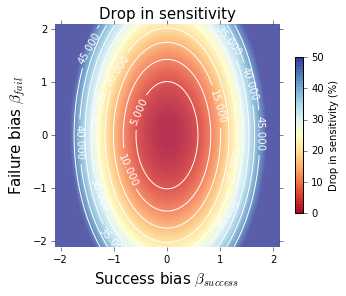

In [13]:
interact(drop,p=(0.0,1.0,.01));